# ADEME Project, Deliverable n°1

## C Group - El Massi Imad, Houille Lukas, Morel Romain, Ritter Antoine, Rouas Léo

Tuesday, 21 May 2024

# Introduction

We come from CesiCDP, that is well known in the optimization field. With the help of our partners, we did some studies on the intelligent multimodal mobility. Even if the new technologies are less expensive and less polluting, it cause new challenges in particular in the optimization of the ressources management. These challenges have a huge importance for the years to come. There is a lot of applications from the delivery of some package to the management of the road axis, the impact on the environment could really make the difference.

We are a team of 5 appointed by CesiCDP to answer the call of the ADEME, our goal is to gain new market with really intersting financement in order to develop our activities.
CesiCDP decided to focus on the management of delivery route.The algorithmic problem consist in calculating a tour on a road network that will link together a subset of cities and comes back to the starting point in a way that will minimize the total duration and the effect on the environment.

We will propose a method from the operational research in order to generate a delivery tour that will answer the problem

Our optimization will take into account the rush hour and off-peak hour, the capacity of the vehicles, we will ensure that every vehicles that enter a city leaves it and that every city is visited once and left by the same vehicle and finally that every vehicle leave the depot.

# Table of contents

* [Mathematical Modelling](#chapter_1)
  * [Decision problem](#section_1_1)
    * [Data](#section_1_1_1)
    * [Problem](#section_1_1_2)
  * [Modelling](#section_1_2)
    * [Decision-making variables](#section_1_2_1)
    * [Objective Function](#section_1_2_2)
    * [Fixed Parameters](#section_1_2_3)
    * [Constraints](#section_1_2_4)
  * [Variables](#section_1_3)
  * [Refences](#section_1_4)
* [State of the Art](#chapter_2)
  * [Delivery Route Management Problem](#section_2_1)
    * [Problem Variants](#section_2_1_1)
    * [Classical Approaches](#section_2_1_2)
  * [Current Constraints and Challenges](#section_2_2)
    * [Time Windows and Vehicle Capacities](#section_2_2_1)
    * [Examples of Constraints](#section_2_2_2)
    * [Traffic Variability](#section_2_2_3)
    * [Solution Examples](#section_2_2_4)
  * [Solution Methods](#section_2_3)
    * [Metaheuristics](#section_2_3_1)
      * [Genetic Algorithms](#section_2_3_1_1)
      * [Ant Colony Optimization](#section_2_3_1_2)
      * [Simulated Annealing](#section_2_3_1_3)
    * [Exact Methods](#section_2_3_2)
      * [Examples of Exact Methods](#section_2_3_2_1)
    * [Hybrid Approaches](#section_2_3_3)
      * [Examples of Hybrid Approaches](##section_2_3_3_1)
  * [Key Studies](#section_2_4)
  * [Front-End](#chapter_3)
    * [Home screen](#section_3_1)
      * [Manual mode](#section_3_1_1)
      * [Assisted mode](#section_3_1_2)
    * [Results screen](#section_3_2)
  * [Conclusion](#chapter_4)

# Chapter 1: Mathematics Modelling <a class="anchor" id="chapter_1"></a>

## Section 1.1: Decision problem <a class="anchor" id="section_1_1"></a>

Firstly we need to proove that our CVRP is np-complete.

For that we need to proove that our CVRP is a part of the NP class:

For our project we need to make a delivery tour that will pass by all cities once and will come back to the first city. we add the distance between all the cities and at the end we have a complexity of O(n).

Now we can verify that a delivery tour is a valid solution of our CVRP in a polynomial time.


After that we need to determine that our CVRP is np-hard

We will compare our CVRP with the Hamiltonian cycle.

The Hamiltonian cycle start from a vertex and pass by all vertex and comes back to the first one.

The Hamiltonian cycle is considered a np-hard problem.

Our represetation of a Hamiltonian cycle

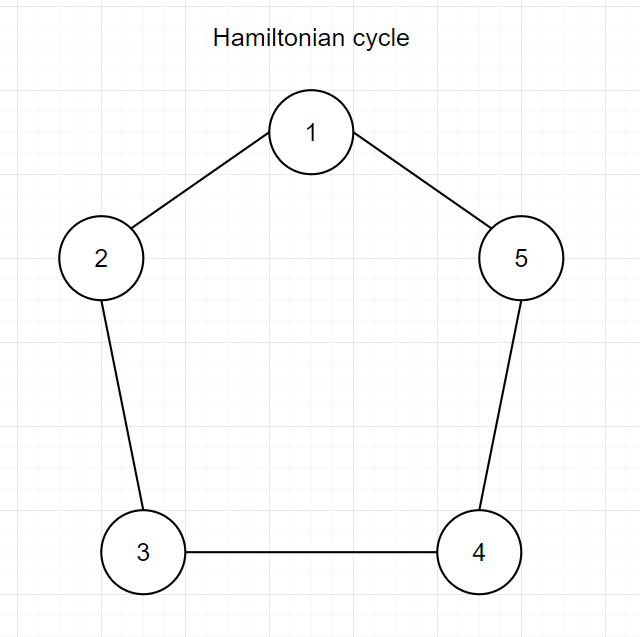


Now we can see our represetation of our CVRP problem

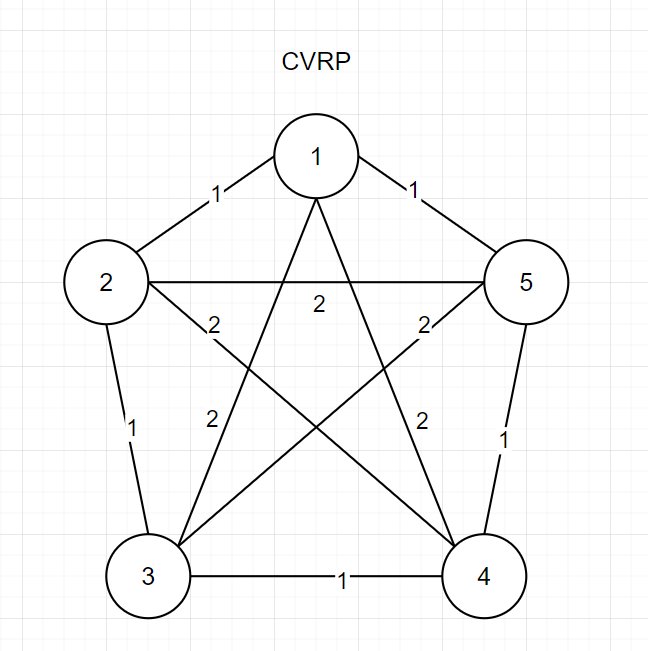


We can see that in the cause case we have a pass 1-2-3-4-5-1, it pass once by all vertex once and end at the starting vertex

With all that we can conclude that our CVRP problem is at least as hard as the Hamiltonian cylce, so our CVRP problem is considered np-complete because it is at least as hard as a np-hard problem and is included in the np problem.

### Section 1.1.1: Data <a class="anchor" id="section_1_1_1"></a>

A set of vertices <i>(city/customer)</i> and weighted edges <i>(Time/Distance Routes)</i>. A number of vehicles departing from and returning to a single vertex <i>(Depot)</i>.

### Section 1.1.2: Problem <a class="anchor" id="section_1_1_2"></a>

Is there a set of routes covering all the vertices such that the total cost of all the tours is minimised?

## Section 1.2: Modelling <a class="anchor" id="section_1_[link text](https://)2"></a>

### Section 1.2.1: Decision-making variables <a class="anchor" id="section_1_2_1"></a>

A decision variable is defined as binary and describes whether a vehicle \( k \) travels between cities \( ( i , j ) \) or not.


\begin{cases}
x_{ij}^k = 1 \space If \space vehicle \space k \space travels \space between \space cities \space i, \space j \\
x_{ij}^k = 0 \space Else
\end{cases}

### Section 1.2.2: Objective Function <a class="anchor" id="section_1_2_2"></a>

Our aim is to minimise the total cost of all the routes. In other words, we need to minimise the sum of the costs of each journey made by each vehicle.

$ Minimise Z = \sum_{k} \sum_{i} \sum_{j} c_{ij} * x_{ij}^k $

### Section 1.2.3: Fixed Parameters <a class="anchor" id="section_1_2_3"></a>

$ c_{ij} $ : Travel costs between towns <i>i and j </i> (Edge weighting)

$ q_{k} $ : Vehicle volume <i>k</i>

$ d_{i} $ : Customer request <i>i</i> (Package volume)

### Section 1.2.4: Constraints <a class="anchor" id="section_1_2_4"></a>

1. **Unique Visit Constraint:**
   - Each customer must be visited exactly once. The depot, which is vertex 0, is excluded from this constraint because it is visited twice (once at the start and once at the end).
   $ \sum_{k} \sum_{i} x_{ij}^k = 1 $ $ \forall i \in N - \{0\} $
   - The constraints ensure that the vehicle enters and leaves each vertex exactly once (flow conservation).
   $ \sum_{i} x_{ij}^k = \sum_{j} x_{ji}^k $ $ \forall i \in N $

2. **Vehicle Capacity Constraint:**
   - Ensure that the total demand of the customers does not exceed the total capacity of the vehicle.
   $ \sum_{i} \sum_{j} d_{i} \cdot x_{ij}^k \leq q_{k} $

3. **Depot Start Constraint:**
   - Each tour must start at the depot. Vertex 0 corresponds to the depot.
   $ \sum_{j} x_{0j}^k = 1 $

4. **Subtour Elimination Constraint:**
   - Ensure there are no subtours in the route.
   $ \sum_{i} \sum_{j} x_{ij}^k \leq N - 1 $ $ \forall i \in N $ $ \forall k \in K $

5. **Time Window Constraint:**
   - $ [a_{i}, b_{i}] $: Time window for customer $ i $
   - $ u_{i}^k $: Delivery time of vehicle $ k $ to customer $ i $
   - $ s_{i} $: Service time for delivery to customer $ i $
   - $ t_{ij} $: Travel time between cities $ i $ and $ j $
   - The constraint ensures that each demand is served within its time window.
   $ a_{i} \leq u_{i}^k \leq b_{i} $
   - The constraint ensures temporal coherence of the tours. A delivery can only be made if the vehicle has already arrived.
   $ u_{i}^k + s_{i} + t_{ij} \leq u_{j}^k $

## Section 1.3: Variables <a class="anchor" id="section_1_3"></a>

$ x_{ij}^k $ : Binary variable that describes whether vehicle <i>k</i> travels between cities <i>( i , j )</i>

$ c_{ij} $ : Travel cost between cities <i>i and j </i> (Edge weighting)

$ q_{k} $ : Vehicle volume <i>k</i>

$ d_{i} $ : Customer request <i>i</i> (Package volume)

$ a_{i} $ : Start time of the time window for customer <i>i</i>

$ b_{i} $ : End time of the time window for customer <i>i</i>

$ u_{i}^k $ : Delivery time of vehicle <i>k</i> to customer <i>i</i>

$ s_{i} $ : Service time for delivery to customer <i>i</i>

$ t_{ij} $ : Travel time between cities <i>i and j</i>

$ Graph (N, E) $ : Graph

$ K $ : Set of vehicles

$ N $ : Set of vertices

$ i,j,k $ : Indices of vertices and vehicles

$ i $ : Start vertex

$ j $ : End vertex

## Section 1.4: Sources <a class="anchor" id="section_1_4"></a>

Source: Optimization of Vehicle Routes for Telecom Network Operations

Arnaud Malapert

# Chapter 2: State of the Art <a class="anchor" id="chapter_2"></a>

Since the 1990s, there has been a global awareness of the need to reduce energy consumption and greenhouse gas emissions. The Kyoto Protocol, signed in 1997 and coming into force in 2005, marked the beginning of international commitments in this direction. This protocol introduced mechanisms to reduce emissions, but many scientists deemed these efforts insufficient to slow down global warming.

In response, several countries and cities have set more ambitious goals. For example, France aims to cut its emissions by a factor of four by 2050, and cities like Paris have adopted action plans to reduce their carbon footprint. Achieving these goals requires changes in behavior and technological innovations, particularly in the transport and resource management sectors.

The French Environment and Energy Management Agency (ADEME) has recently issued a call for expressions of interest to promote new and sustainable mobility solutions, emphasizing the importance of efficient delivery route management to reduce environmental impacts.

## Section 2.1: Delivery Route Management Problem <a class="anchor" id="section_2_1"></a>

Delivery route management involves optimizing vehicle routes to minimize total distance, time, or costs while adhering to various constraints. This problem is often modeled as the Traveling Salesman Problem (TSP) or its variants.

### Section 2.1.1: Problem Variants <a class="anchor" id="section_2_1_1"></a>

- **Traveling Salesman Problem (TSP)**: Finding the shortest path that visits a set of cities and returns to the starting city.
- **Vehicle Routing Problem (VRP)**: An extension of the TSP where multiple vehicles are used to serve a set of customers with specific demands.
- **VRP with Time Windows (VRPTW)**: Customers must be served within specific time windows.

### Section 2.1.2: Classical Approaches <a class="anchor" id="section_2_1_2"></a>

- **Exact Methods**: Integer linear programming, branch and bound, and branch and cut. These methods guarantee optimal solutions but are limited by their complexity for large instances.
- **Metaheuristics**: Genetic algorithms, ant colony optimization, simulated annealing. These approaches find near-optimal solutions in reasonable computation times.
- **Heuristics**: Methods like the nearest neighbor and greedy algorithms, which offer quick solutions but may be far from optimal.

## Section 2.2: Current Constraints and Challenges <a class="anchor" id="section_2_2"></a>

### Section 2.2.1: Time Windows and Vehicle Capacities <a class="anchor" id="section_2_2_1"></a>

Time windows for deliveries add complexity to the base problem, requiring vehicles to meet specific schedules. Similarly, limited vehicle capacities impose restrictions on the quantity and dimensions of transported goods. These constraints not only change the values of solutions but also the space of admissible solutions.

### Section 2.2.2: Examples of Constraints <a class="anchor" id="section_2_2_2"></a>

- **Strict Time Windows**: Each delivery must be made within a predefined time interval. This requires algorithms capable of handling strict temporal constraints.
- **Multidimensional Capacity**: Vehicles have limited capacities in terms of volume and weight, requiring algorithms that can handle these multiple dimensions.

### Section 2.2.3: Traffic Variability <a class="anchor" id="section_2_2_3"></a>

Traffic variability, causing travel times to fluctuate, is another major constraint. To address this, models need to be dynamic, accounting for temporal variations in traffic conditions to optimize routes in real-time.

### Section 2.2.4: Solution Examples <a class="anchor" id="section_2_2_4"></a>

- **Dynamic Models**: Use real-time data to adjust routes based on current traffic conditions.
- **Robust Algorithms**: Develop algorithms that can adapt to uncertainties and variations in constraints, ensuring stable performance.

## Section 2.3: Solution Methods <a class="anchor" id="section_2_3"></a>

### Section 2.3.1: Metaheuristics <a class="anchor" id="section_2_3_1"></a>


Metaheuristics, such as genetic algorithms, ant colony optimization, and simulated annealing, are widely used to solve delivery route management problems. These approaches offer flexibility to include complex constraints and can find near-optimal solutions within reasonable computation times.

#### Section 2.3.1.1: Genetic Algorithms <a class="anchor" id="section_2_3_1_1"></a>

- **Principle**: Inspired by natural selection, these algorithms use populations of candidate solutions, evaluate them, and recombine them to create new solutions.
- **Advantages**: Flexibility and ability to escape local minima.
- **Disadvantages**: Complex parameter tuning and potentially high computation time.

#### Section 2.3.1.2: Ant Colony Optimization <a class="anchor" id="section_2_3_1_2"></a>

- **Principle**: Inspired by the behavior of ants, these algorithms use agents that deposit pheromones to signal good paths, allowing for collective optimization.
- **Advantages**: Good performance for routing problems, adaptability.
- **Disadvantages**: Slow convergence in some cases.

#### Section 2.3.1.3: Simulated Annealing <a class="anchor" id="section_2_3_1_3"></a>

- **Principle**: Based on the cooling process of metals, this algorithm explores the solution space by accepting worse solutions with a probability that decreases over time.
- **Advantages**: Ability to escape local minima.
- **Disadvantages**: Slow convergence and sensitivity to parameter settings.

### Section 2.3.2: Exact Methods <a class="anchor" id="section_2_3_2"></a>

Exact methods, such as integer linear programming, guarantee optimal solutions but are often limited by their computational complexity for large instances. Recent advances in combinatorial optimization and problem decomposition techniques allow for handling increasingly larger instances.

#### Section 2.3.2.1: Examples of Exact Methods <a class="anchor" id="section_2_3_2_1"></a>

- **Branch and Bound**: Systematically explores all possible solutions by dividing them into smaller subproblems.
- **Branch and Cut**: An extension of branch and bound that adds cutting planes to reduce the search space.

### Section 2.3.3: Hybrid Approaches <a class="anchor" id="section_2_3_3"></a>

Combining metaheuristics and exact methods can leverage the strengths of both. For instance, a metaheuristic can provide a good initial solution, which is then refined using exact methods.

#### Section 2.3.3.1: Examples of Hybrid Approaches <a class="anchor" id="section_2_3_3_1"></a>

- **Matheuristics**: Combining metaheuristics with mathematical programming.
- **Memetic Algorithms**: Combining genetic algorithms with local search techniques.

## Section 2.4: Key Studies <a class="anchor" id="section_2_4"></a>

### Section 2.4.1: Machine Learning Approaches to VRP <a class="anchor" id="section_2_4_1"></a>

- **Bogyrbayeva et al. (2022)** in their article *"Learning to Solve Vehicle Routing Problems: A Survey"* provide a systematic overview of machine learning methods applied to VRPs, presenting taxonomy for learning paradigms, solution structures, underlying models, and algorithms. They detail the competitiveness of state-of-the-art methods against traditional approaches and outline future research directions (Bogyrbayeva, Meraliyev, Mustakhov, & Dauletbayev, 2022).

### Section 2.4.2: Reinforcement Learning <a class="anchor" id="section_2_4_2"></a>

- **Nazari et al. (2018)** in their article *"Reinforcement Learning for Solving the Vehicle Routing Problem"* present an end-to-end framework using reinforcement learning for VRPs, training a single policy model that produces near-optimal solutions for various problem instances. Their approach outperforms classical heuristics and Google’s OR-Tools on medium-sized instances (Nazari, Oroojlooy, Takác, & Snyder, 2018).

### Section 2.4.3: Comparative Analysis of Meta-Heuristics <a class="anchor" id="section_2_4_3"></a>

- **Kaja (2020)** in their thesis *"A New Approach for Solving the Disruption in Vehicle Routing Problem During the Delivery: A Comparative Analysis of VRP Meta-Heuristics"* explores meta-heuristic techniques like Tabu Search, Ant Colony Optimization, and Genetic Algorithm for solving real-time disruption in VRPs. The study concludes that Tabu Search performs best for real-time disruptions, followed by Ant Colony Optimization and Genetic Algorithm (Kaja, 2020).

### Section 2.4.4: Industrial Case Study <a class="anchor" id="section_2_4_4"></a>

- **Jayarathna et al. (2022)** in their article *"Industrial Vehicle Routing Problem: A Case Study"* address a real-world VRP application in the FMCG industry, using a centralized delivery strategy to optimize truck allocation and reduce costs. Their study demonstrates a 34% cost saving with the new strategy compared to the existing decentralized system (Jayarathna, Lanel, & Juman, 2022).

## Section 2.5: Conclusion <a class="anchor" id="section_2_5"></a>

Optimized delivery route management is crucial for reducing the environmental impact of freight transport. Operations research approaches, including metaheuristics and exact methods, offer effective solutions for addressing complex constraints such as time windows and traffic variability. Recent advancements in machine learning, particularly reinforcement learning, show promising results in solving VRPs more efficiently.

Our study will explore algorithms suited for delivery route management to meet the requirements of ADEME's call for expressions of interest, focusing on generating realistic and efficient delivery routes. By incorporating real-time data and robust algorithms, we aim to develop a solution that not only optimizes delivery routes but also adapts to changing conditions, ensuring reliability and sustainability in freight transport.

## Section 2.6: References <a class="anchor" id="section_2_6"></a>

1. Bogyrbayeva, A., Meraliyev, M., Mustakhov, T., & Dauletbayev, B. (2022). Learning to solve vehicle routing problems: A survey. arXiv preprint arXiv:2205.02453. Retrieved from [https://arxiv.org/abs/2205.02453](https://arxiv.org/abs/2205.02453)

2. Kaja, S. C. (2020). A New Approach for Solving the Disruption in Vehicle Routing Problem During the Delivery: A Comparative Analysis of VRP Meta-Heuristics. Retrieved from [http://www.diva-portal.org/smash/get/diva2:1436175/FULLTEXT02.pdf](http://www.diva-portal.org/smash/get/diva2:1436175/FULLTEXT02.pdf)

3. Nazari, M., Oroojlooy, A., Snyder, L., & Takác, M. (2018). Reinforcement learning for solving the vehicle routing problem. Advances in neural information processing systems, 31. Retrieved from [https://arxiv.org/abs/1802.04240](https://arxiv.org/abs/1802.04240)

4. Jayarathna, D. G. N. D., Lanel, G. H. J., & Juman, Z. A. M. S. (2022). Industrial vehicle routing problem: a case study. Journal of Shipping and Trade, 7(1), 6. Retrieved from [https://doi.org/10.1186/s41072-022-00108-7](https://doi.org/10.1186/s41072-022-00108-7)

# Chapter 3: Front-End <a class="anchor" id="chapter_3"></a>

## Section 3.1 : Home screen <a class="anchor" id="section_3_1"></a>
![](screen.jpg)

This is the first look at the interface. In the background, the map displays where the travels will be shown. A left panel allows the user to interact with the algorithm. Two modes exist: the manual mode and the assisted mode.

### Section 3.1.1: Manual mode <a class="anchor" id="section_3_1_1"></a>

In manual mode, the user can custom the experiment by creating trucks groups and package groups.

![](screen3.jpg) 
![](screen4.jpg)

### Section 3.1.2: Assisted mode <a class="anchor" id="section_3_1_2"></a>

In assisted mode, the user can let the program randomly create the trucks and packages groups. 

![](screen2.jpg)

## Section 3.2 : Results Screen <a class="anchor" id="section_3_2"></a>

After the algorithm has been executed, a summary of the experiment is displayed on the left. The user can see the routes taken by the trucks.

![](screen5.jpg)

# Chapter 4: Conclusion <a class="anchor" id="chapter_4"></a>

To wrap up, we adopted an agile methodology from the start, agreeing on regular check-ins to ensure smooth progress. This method ensures that we have a clear view of our project's progress and can quickly identify any blocking points. The project's constraints were define early on by the whole team, setting a clear path for our work.

In terms of organization, we divided the tasks based on each team member's strengths and each desire. Lukas focused on the front-end development, bringing the first interface to life. Antoine handled the state-of-the-art research, providing us with a solid foundation of current knowledge. Romain, Imad, and Leo took charge of the mathematical modeling, developing the core model and calculations needed for our project.

With our calculations we can ensure that the complexity of the problem is NP Complet and the formula found is as follows  [insert formula]

We have already decided on the teams for our future work: Romain and Antoine will handle the back-end. On the other hand, Imad, Lukas, and Leo will focus on the front-end. They will be responsible for creating a dynamic and responsive website, utilizing modern web technologies to engage users effectively. For the back-end, we will be using Python, leveraging its robust frameworks and libraries to ensure a reliable and efficient system.

By working collaboratively and leveraging our individual skills, we were able to efficiently manage our tasks and achieve our project goals for the first deliverable.